<h1>Лабораторна робота 2</h1>
<h2>Студентки групи МІТ-31</h2>
<h2>Агафонової Мирослави</h2>

<h2>Завдання 1</h2>

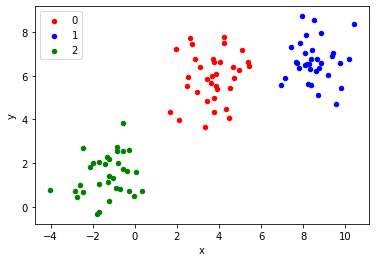

In [1]:
#classification
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [9]:
print(X,y)

[[ 5.41030814  6.43972011]
 [-2.45883325  0.68503037]
 [ 8.51259826  8.55491066]
 [ 3.7824916   6.63462728]
 [ 8.35311903  5.60074455]
 [-0.90322054  0.87051099]
 [ 5.39878443  6.63764776]
 [ 8.84403606  6.60636126]
 [ 2.46446345  5.53727905]
 [ 4.68453377  6.40764605]
 [ 8.76215834  6.37639535]
 [-0.56177963  2.54116773]
 [ 0.33367984  0.73285666]
 [ 4.72376096  5.91495873]
 [ 9.35989871  6.91906731]
 [ 3.33682448  3.66412859]
 [ 9.5669211   4.72621945]
 [ 3.8443767   6.06505028]
 [ 8.2939761   6.55001375]
 [ 8.60594531  6.21311997]
 [ 3.74009923  6.78649924]
 [-1.2238704   2.18910891]
 [-2.84653     0.73927442]
 [ 2.08492113  3.99731423]
 [-4.04392121  0.78261931]
 [-0.28779221  2.61885881]
 [-1.22358136  0.27908255]
 [-1.23613921  1.38678188]
 [ 8.66275716  6.76672624]
 [ 5.07416142  7.17213374]
 [ 8.09639207  6.4863797 ]
 [ 3.76382454  5.00406683]
 [ 7.12594042  5.91139505]
 [ 9.77497025  6.59823225]
 [-2.00978767  1.98219945]
 [-0.0420827   0.4963943 ]
 [ 3.65974286  5.97344106]
 

In [17]:
#write to our file
df.to_csv('sklearn_data_set.csv')
df.head()

,x,y,label
0,5.410308,6.439720,0
1,-2.458833,0.685030,2
2,8.512598,8.554911,1
3,3.782492,6.634627,0
4,8.353119,5.600745,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
 2   label   100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.1 KB


In [15]:
df.describe()

,x,y,label
count,100.000000,100.000000,100.000000
mean,3.637144,4.693041,0.990000
std,4.121732,2.510031,0.822598
min,-4.043921,-0.328652,0.000000
25%,-0.554723,2.152333,0.000000
50%,3.767790,5.595406,1.000000
75%,7.986298,6.624949,2.000000
max,10.429017,8.728519,2.000000


<AxesSubplot:>

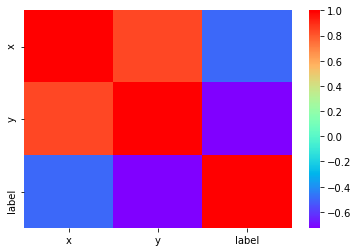

In [18]:
corr = df.corr()
sns.heatmap(corr, cmap="rainbow")

<h2>Завдання 2</h2>

In [28]:
import random as rnd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import sklearn
from sklearn.model_selection import train_test_split

Laptop_param = {0:'Asus', 1:'Lenovo'}
time = {0:'<120', 1:'>120'}
version = {0:'new', 1:'unpacked'}
supported = {0:'YES', 1:'NO'}
copies = {0:'0', 1:'1', 2:'2', 3:'More than 3'}
store = {0:'cactus', 1:'foxtrot', 2:'comfy', 3:'eldorado'}
data = []
for i in range(0, 512):
    row = []
    row.append(round(rnd.uniform(1, 50), 2))
    row.append(round(rnd.uniform(1, 10), 2))
    row.append(Laptop_param[rnd.randint(0, 1)])
    row.append(time[rnd.randint(0, 1)])
    row.append(version[rnd.randint(0, 1)])
    row.append(supported[rnd.randint(0, 1)])
    row.append(copies[rnd.randint(0, 3)])
    row.append(store[rnd.randint(0, 3)])
    data.append(row)
df = pd.DataFrame(data, columns=['total_utility_bill', 'commission', 'Laptop_param', 'time', 'version', 'supported', 'copies', 'store'])

In [44]:

df.replace({'Asus': 0, 'Lenovo':1, '<120': 0, '>120':1, 'new':0, 'unpacked':1, 'YES':0, 'NO':1, '5':5, '6':6, '7':7, 'More than 7':8, 'cactus': 0
, 'foxtrot':1, 'comfy':2, 'eldorado':3}, None, True)

df.to_csv('data_set.csv')

In [46]:
df.head()

,total_utility_bill,commission,Laptop_param,time,version,supported,copies,store
0,3.01,4.67,0,1,0,0,3,3
1,2.23,4.88,1,1,0,1,3,3
2,16.94,3.75,0,1,0,1,5,0
3,30.67,9.49,0,1,0,0,5,1
4,33.32,5.97,0,1,0,0,5,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_utility_bill  512 non-null    float64
 1   commission          512 non-null    float64
 2   Laptop_param        512 non-null    int64  
 3   time                512 non-null    int64  
 4   version             512 non-null    int64  
 5   supported           512 non-null    int64  
 6   copies              512 non-null    int64  
 7   store               512 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.1 KB


In [48]:
df.describe()

,total_utility_bill,commission,Laptop_param,time,version,supported,copies,store
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,26.514199,5.561562,0.488281,0.503906,0.480469,0.476562,5.201172,1.603516
std,14.163111,2.578534,0.500352,0.500474,0.500107,0.499939,1.432280,1.117827
min,1.020000,1.060000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,14.765000,3.222500,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
50%,26.200000,5.690000,0.000000,1.000000,0.000000,0.000000,5.000000,2.000000
75%,38.877500,7.760000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000
max,49.960000,9.920000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000


<AxesSubplot:>

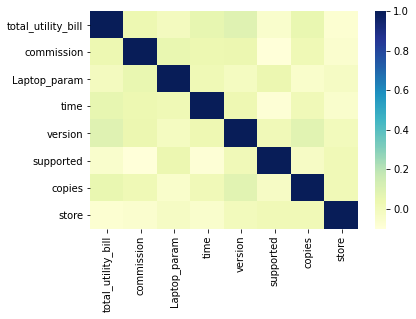

In [49]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [50]:
columns=df.columns
columns=columns[:7]
X=df[['total_utility_bill', 'commission', 'Laptop_param', 'time', 'version', 'supported', 'store']]

y=df[['store']]

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
y_Hat = lr.predict(X_test)

In [55]:
mean_absolute_error(y_test, y_Hat)

5.566456940274638e-16

In [56]:
mean_squared_error(y_test, y_Hat)

5.344693605006439e-31

In [58]:
res = pd.DataFrame(y_test)
res['store_predicted'] = y_Hat

res.head()

,store,store_predicted
472,2,2.000000e+00
119,1,1.000000e+00
378,0,3.696582e-16
504,2,2.000000e+00
392,0,-7.167477e-16


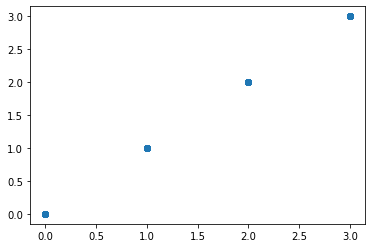

In [59]:

plt.scatter(res['store'],res['store_predicted'])

<h2>Завдання 3</h2>

In [5]:
## for data
import lime
import lime.lime_tabular
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

In [83]:
bills = pd.read_csv('bill.csv')
bills.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [85]:
print(bills.shape)

(1372, 4)


In [86]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [87]:
bills.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


<AxesSubplot:>

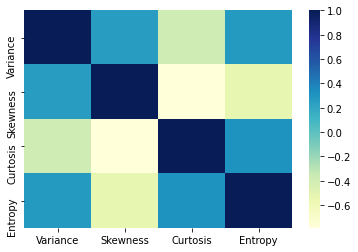

In [88]:
corr = bills.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [101]:
X_train,X_test,y_train,y_test = train_test_split(bills.Variance,bills.Skewness,test_size=0.3)

In [104]:
regr = LinearRegression()#impose a linear regression

In [106]:
regr.fit(np.array(X_train).reshape(-1,1), y_train)#This will call LinearRegression(), and then allow us to use our own data to predict.

LinearRegression()

In [107]:
preds = regr.predict(np.array(X_test).reshape(-1,1))#to pass in the data to give predictions.

In [108]:
y_test.head()

0       8.66610
1001    1.52500
978     0.29176
1116    1.77340
892    -0.69529
Name: Skewness, dtype: float64

In [109]:
preds

array([ 3.42050181e+00,  1.52882741e+00,  1.94002423e+00,  1.28919416e+00,
        1.65834644e+00,  7.42170873e-01,  3.66595170e+00,  3.22387297e+00,
        4.44801936e+00,  1.13755039e-01, -3.95659492e-01,  2.22573080e+00,
        2.00491899e+00,  1.42319863e+00,  3.34752883e+00,  1.71776435e+00,
        2.50236759e-01,  2.58976825e+00,  2.04613761e+00,  3.47925256e+00,
        1.68651164e+00,  1.68168125e+00,  3.40839998e+00, -4.26379516e-01,
       -1.50556256e+00,  8.12247694e-01,  9.52918509e-01,  5.66487506e-01,
        2.84395834e+00,  2.48431685e+00,  5.86398633e-01,  3.38130016e+00,
        2.96409742e+00,  5.14925447e-01,  3.30796516e+00,  1.85179467e+00,
        1.48222348e+00, -5.49982217e-02,  2.15136145e+00,  4.34132676e+00,
       -6.98410614e-02,  1.84260969e+00,  3.95230989e+00,  2.23193686e+00,
       -5.56293151e-01,  2.24662455e+00,  2.62953878e+00,  3.64474764e+00,
        1.14779930e+00,  2.49828050e+00,  1.27524603e+00,  3.90566097e+00,
        1.55119609e+00,  

In [94]:
mean_absolute_error(y_test, y_Hat)

7.570538109507172e-16

In [95]:
mean_squared_error(y_test, y_Hat)

9.15922466847159e-31

In [110]:
residuals = preds - y_test

In [112]:
residuals

0      -5.245598
1001    0.003827
978     1.648264
1116   -0.484206
892     2.353636
          ...   
187    -3.872540
466    -1.457689
251    -8.265816
802    -0.074627
682     7.361649
Name: Skewness, Length: 412, dtype: float64

(array([17., 28., 63., 64., 69., 71., 20., 52., 17., 11.]),
 array([-12.04668453,  -9.54378614,  -7.04088776,  -4.53798937,
         -2.03509099,   0.4678074 ,   2.97070578,   5.47360417,
          7.97650255,  10.47940094,  12.98229932]),
 <BarContainer object of 10 artists>)

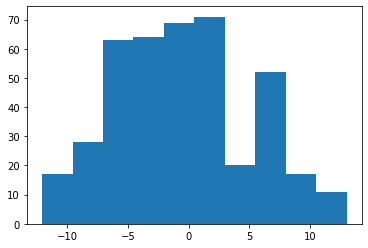

In [111]:
plt.hist(residuals)

<AxesSubplot:xlabel='Variance'>

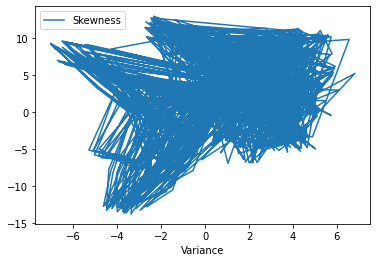

In [99]:

bills.plot("Variance", "Skewness")

<AxesSubplot:xlabel='Variance', ylabel='Skewness'>

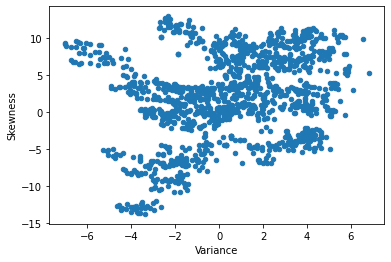

In [100]:
bills.plot.scatter("Variance", "Skewness")

<h2>Summury</h2>
We focused on the prediction accuracy. 

Our objective is to learn a model that has a good generalization performance.

Such a model maximizes the prediction accuracy. 

We identified the machine learning algorithm that is best-suited for the problem at hand (i.e. bills classification); 

therefore, we compared different algorithms and selected the best-performing one.